<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-07 14:50:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.7MB/s    in 2.4s    

2025-09-07 14:50:10 (63.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [7]:
print(df.columns.tolist())


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [8]:
print(df["Age"].unique())


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


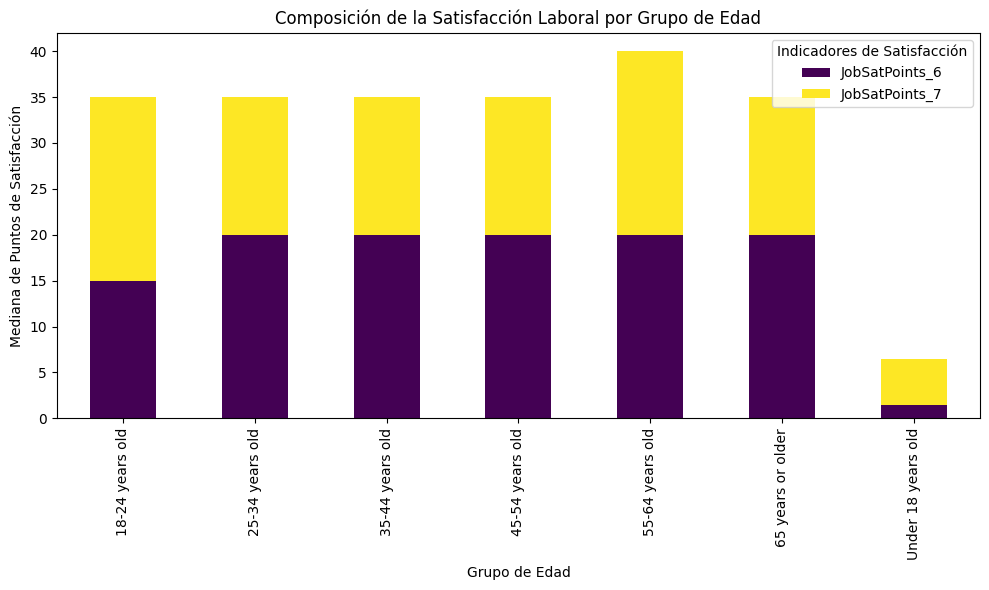

In [9]:
# Filtrar filas con valores válidos de edad
valid_ages = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_filtered = df[df["Age"].isin(valid_ages)]

# Agrupar por edad y calcular la mediana de los puntos de satisfacción
grouped = df_filtered.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Crear el gráfico apilado
grouped.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

# Personalizar el gráfico
plt.title("Composición de la Satisfacción Laboral por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Mediana de Puntos de Satisfacción")
plt.legend(title="Indicadores de Satisfacción")
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_1576/222229283.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


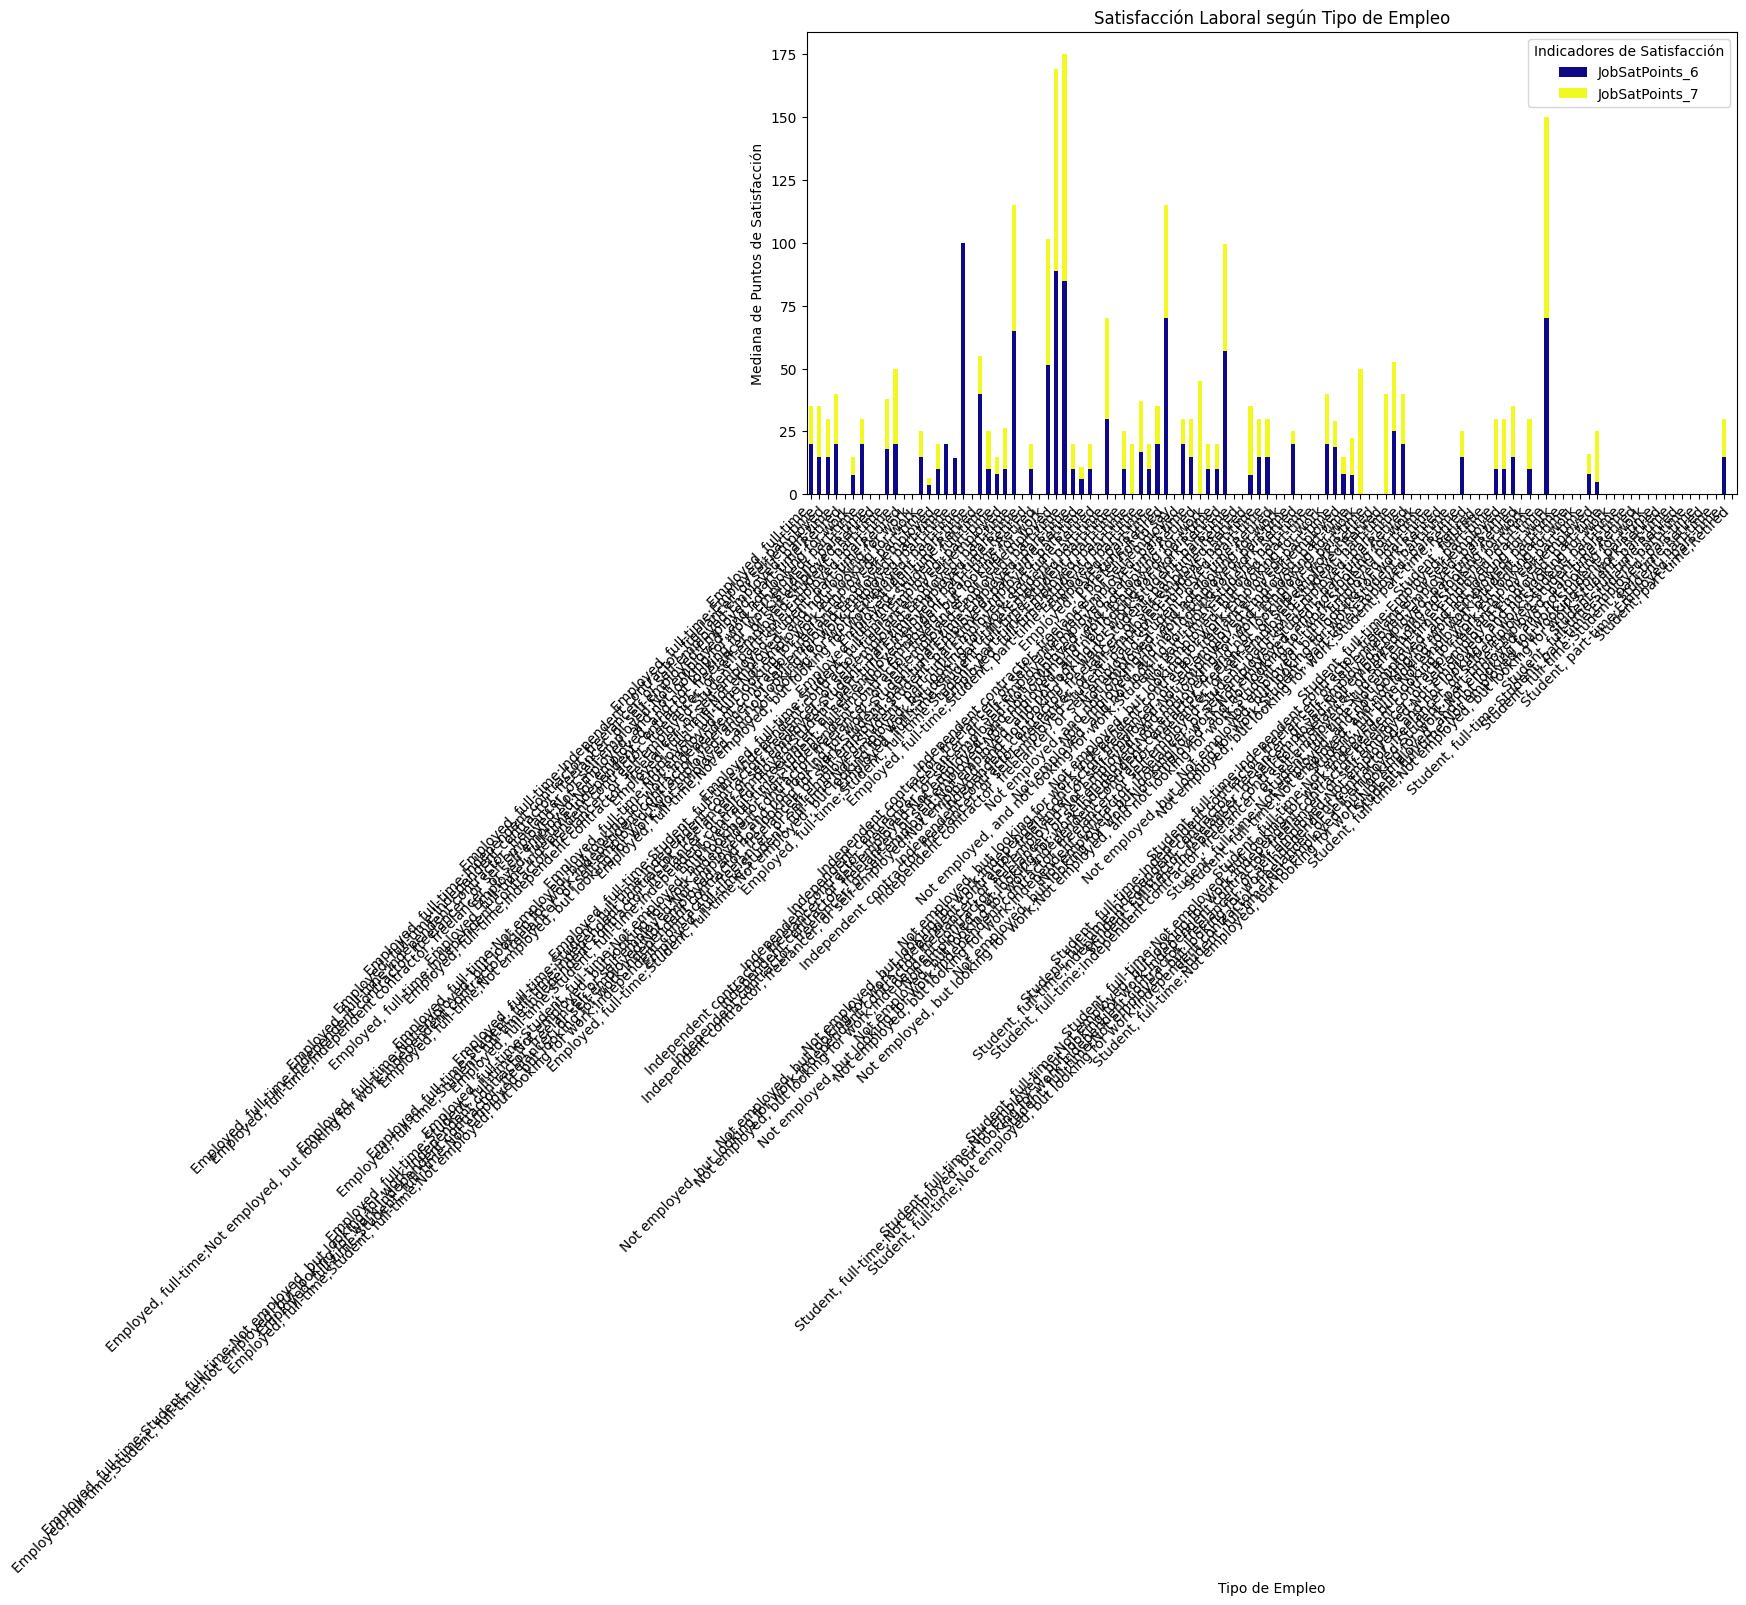

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Filtrar filas con valores válidos en la columna Employment
df_filtered = df[df["Employment"].notna()]

# Agrupar por tipo de empleo y calcular la mediana de los puntos de satisfacción
grouped = df_filtered.groupby("Employment")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Crear el gráfico apilado
grouped.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="plasma")

# Personalizar el gráfico
plt.title("Satisfacción Laboral según Tipo de Empleo")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Mediana de Puntos de Satisfacción")
plt.legend(title="Indicadores de Satisfacción")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [11]:
print("Valores únicos en JobSatPoints_6:")
print(df["JobSatPoints_6"].unique())

print("\nValores únicos en JobSatPoints_7:")
print(df["JobSatPoints_7"].unique())


Valores únicos en JobSatPoints_6:
[   nan   0.    25.    30.    60.   100.    20.    50.    15.    10.
   5.    80.     8.    65.    90.    75.    35.    40.    33.    70.
  17.     7.    12.    13.     9.    21.    18.    95.     2.    45.
  34.    16.    78.    85.     1.    14.    31.    11.    23.    28.
  81.     6.25   6.    55.     3.    22.    42.     4.    89.    99.
  12.5   36.    27.    24.    19.    87.    88.    29.    33.33  33.3
  37.    39.    77.    68.    26.    98.    32.    66.    57.    82.
  94.    61.    43.    69.    76.    73.    17.5   46.    49.    52.
  97.    96.    67.    91.    86.    56.    41.    74.    51.    48.
  44.    64.    54.    63.  ]

Valores únicos en JobSatPoints_7:
[    nan   0.     10.     90.     20.     50.     15.      5.     60.
  30.    100.      7.     25.     70.     65.     80.     33.     40.
  35.     27.     23.     14.     12.      9.      8.     18.     37.
  75.      1.     11.     29.     17.      4.     21.     54.     13.

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Crear una columna de edad numérica estimada
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df["AgeNumeric"] = df["Age"].map(age_map)

# Filtrar por edad estimada entre 30 y 35 años
df_filtered = df[(df["AgeNumeric"] >= 30) & (df["AgeNumeric"] <= 35)]

# Eliminar nulos en las columnas clave
df_clean = df_filtered[["ConvertedCompYearly", "JobSatPoints_6"]].dropna()

# Crear índice por individuo
df_clean = df_clean.reset_index(drop=True)
df_clean["Individuo"] = df_clean.index.astype(str)

# Crear gráfico apilado por individuo
df_clean.set_index("Individuo")[["ConvertedCompYearly", "JobSatPoints_6"]].plot(
    kind="bar", stacked=True, figsize=(14, 6), colormap="viridis"
)

# Personalizar el gráfico
plt.title("Composición de Compensación y Satisfacción Laboral (Edad 30–35)")
plt.xlabel("Individuos")
plt.ylabel("Valor")
plt.xticks(rotation=90)
plt.legend(title="Indicadores")
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


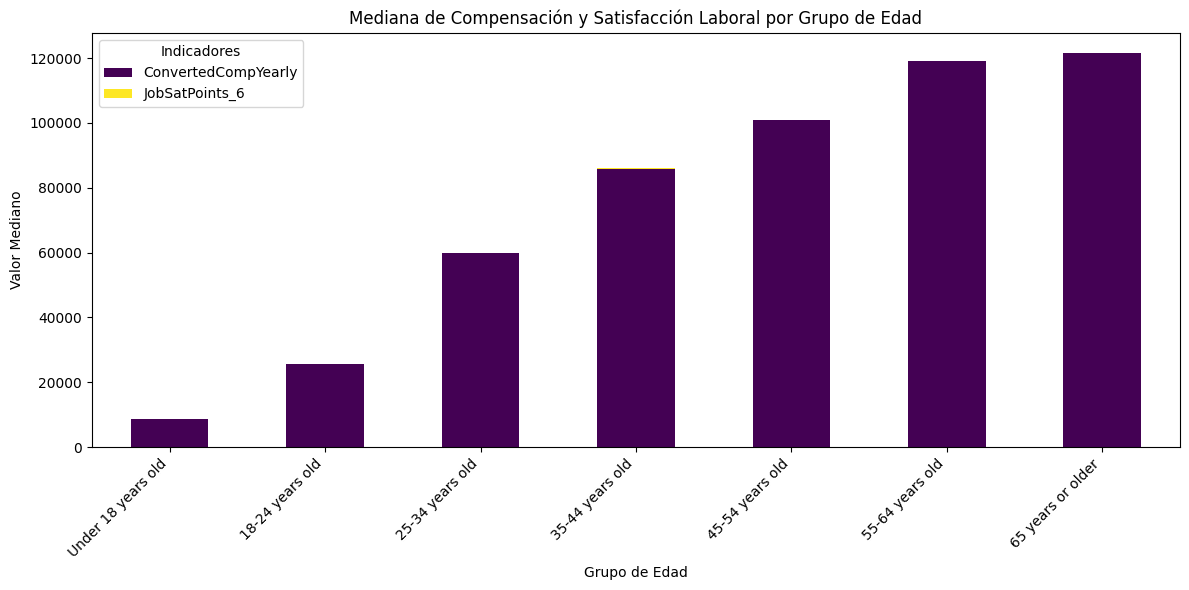

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Definir los grupos de edad válidos
age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filtrar solo los grupos de edad válidos
df_filtered = df[df["Age"].isin(age_groups)]

# Eliminar nulos en las columnas clave
df_filtered = df_filtered[["Age", "ConvertedCompYearly", "JobSatPoints_6"]].dropna()

# Agrupar por grupo de edad y calcular la mediana
grouped = df_filtered.groupby("Age")[["ConvertedCompYearly", "JobSatPoints_6"]].median()

# Reordenar los grupos de edad en orden lógico
ordered_age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
grouped = grouped.loc[ordered_age_groups]

# Crear gráfico apilado
grouped.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

# Personalizar el gráfico
plt.title("Mediana de Compensación y Satisfacción Laboral por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Valor Mediano")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Indicadores")
plt.tight_layout()
plt.show()


In [18]:
print(df["JobSatPoints_6"].dtype)



float64


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


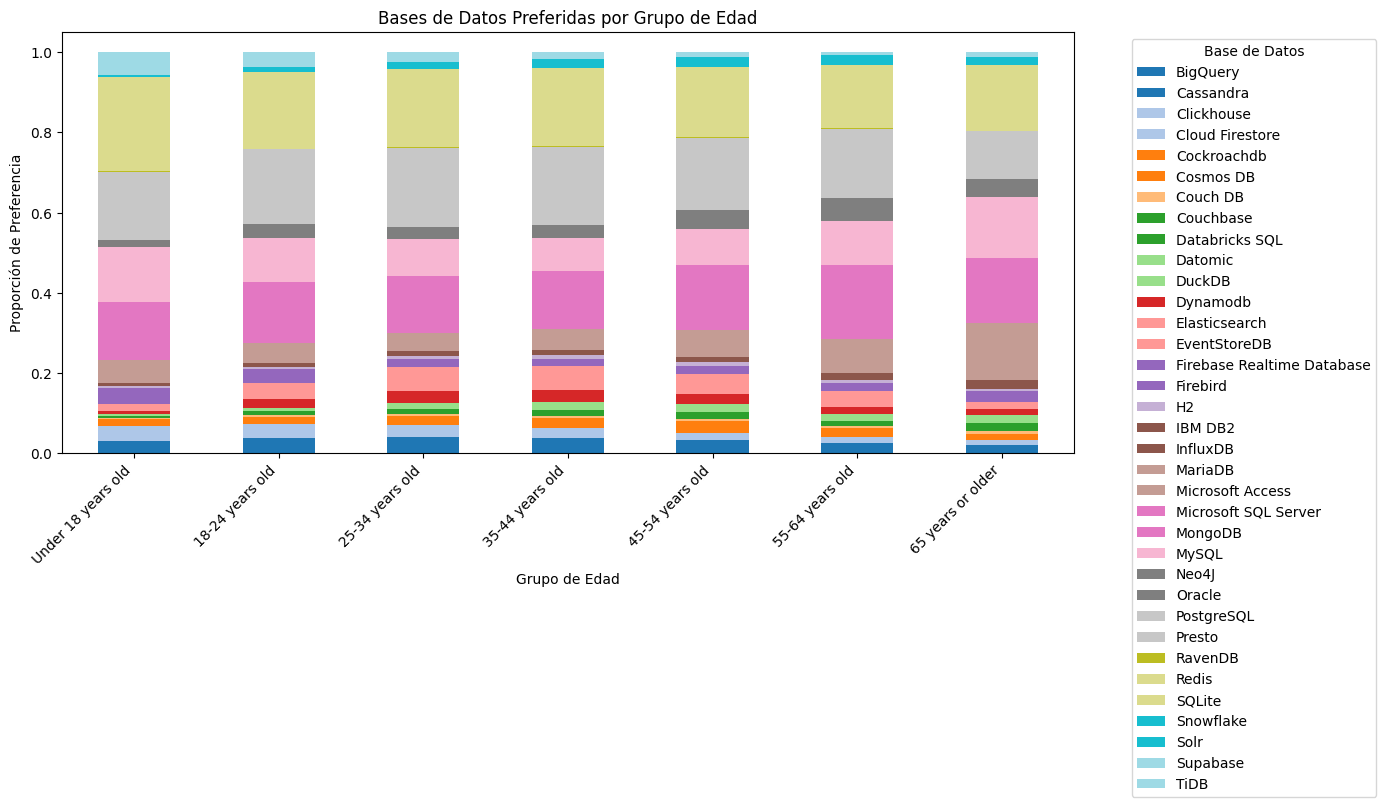

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Definir los grupos de edad válidos
age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filtrar filas con edad válida y columna de bases de datos no nula
df_filtered = df[df["Age"].isin(age_groups)][["Age", "DatabaseWantToWorkWith"]].dropna()

# Separar múltiples bases de datos (asumiendo que están separadas por punto y coma)
df_filtered["DatabaseList"] = df_filtered["DatabaseWantToWorkWith"].str.split(";")

# Expandir filas para cada base de datos individual
df_exploded = df_filtered.explode("DatabaseList")
df_exploded["DatabaseList"] = df_exploded["DatabaseList"].str.strip()

# Contar ocurrencias por grupo de edad y base de datos
counts = df_exploded.groupby(["Age", "DatabaseList"]).size().unstack(fill_value=0)

# Convertir a proporciones por grupo de edad
proportions = counts.div(counts.sum(axis=1), axis=0)

# Reordenar los grupos de edad
ordered_age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
proportions = proportions.loc[ordered_age_groups]

# Crear gráfico apilado
proportions.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")

# Personalizar el gráfico
plt.title("Bases de Datos Preferidas por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Proporción de Preferencia")
plt.legend(title="Base de Datos", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_1576/340386812.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


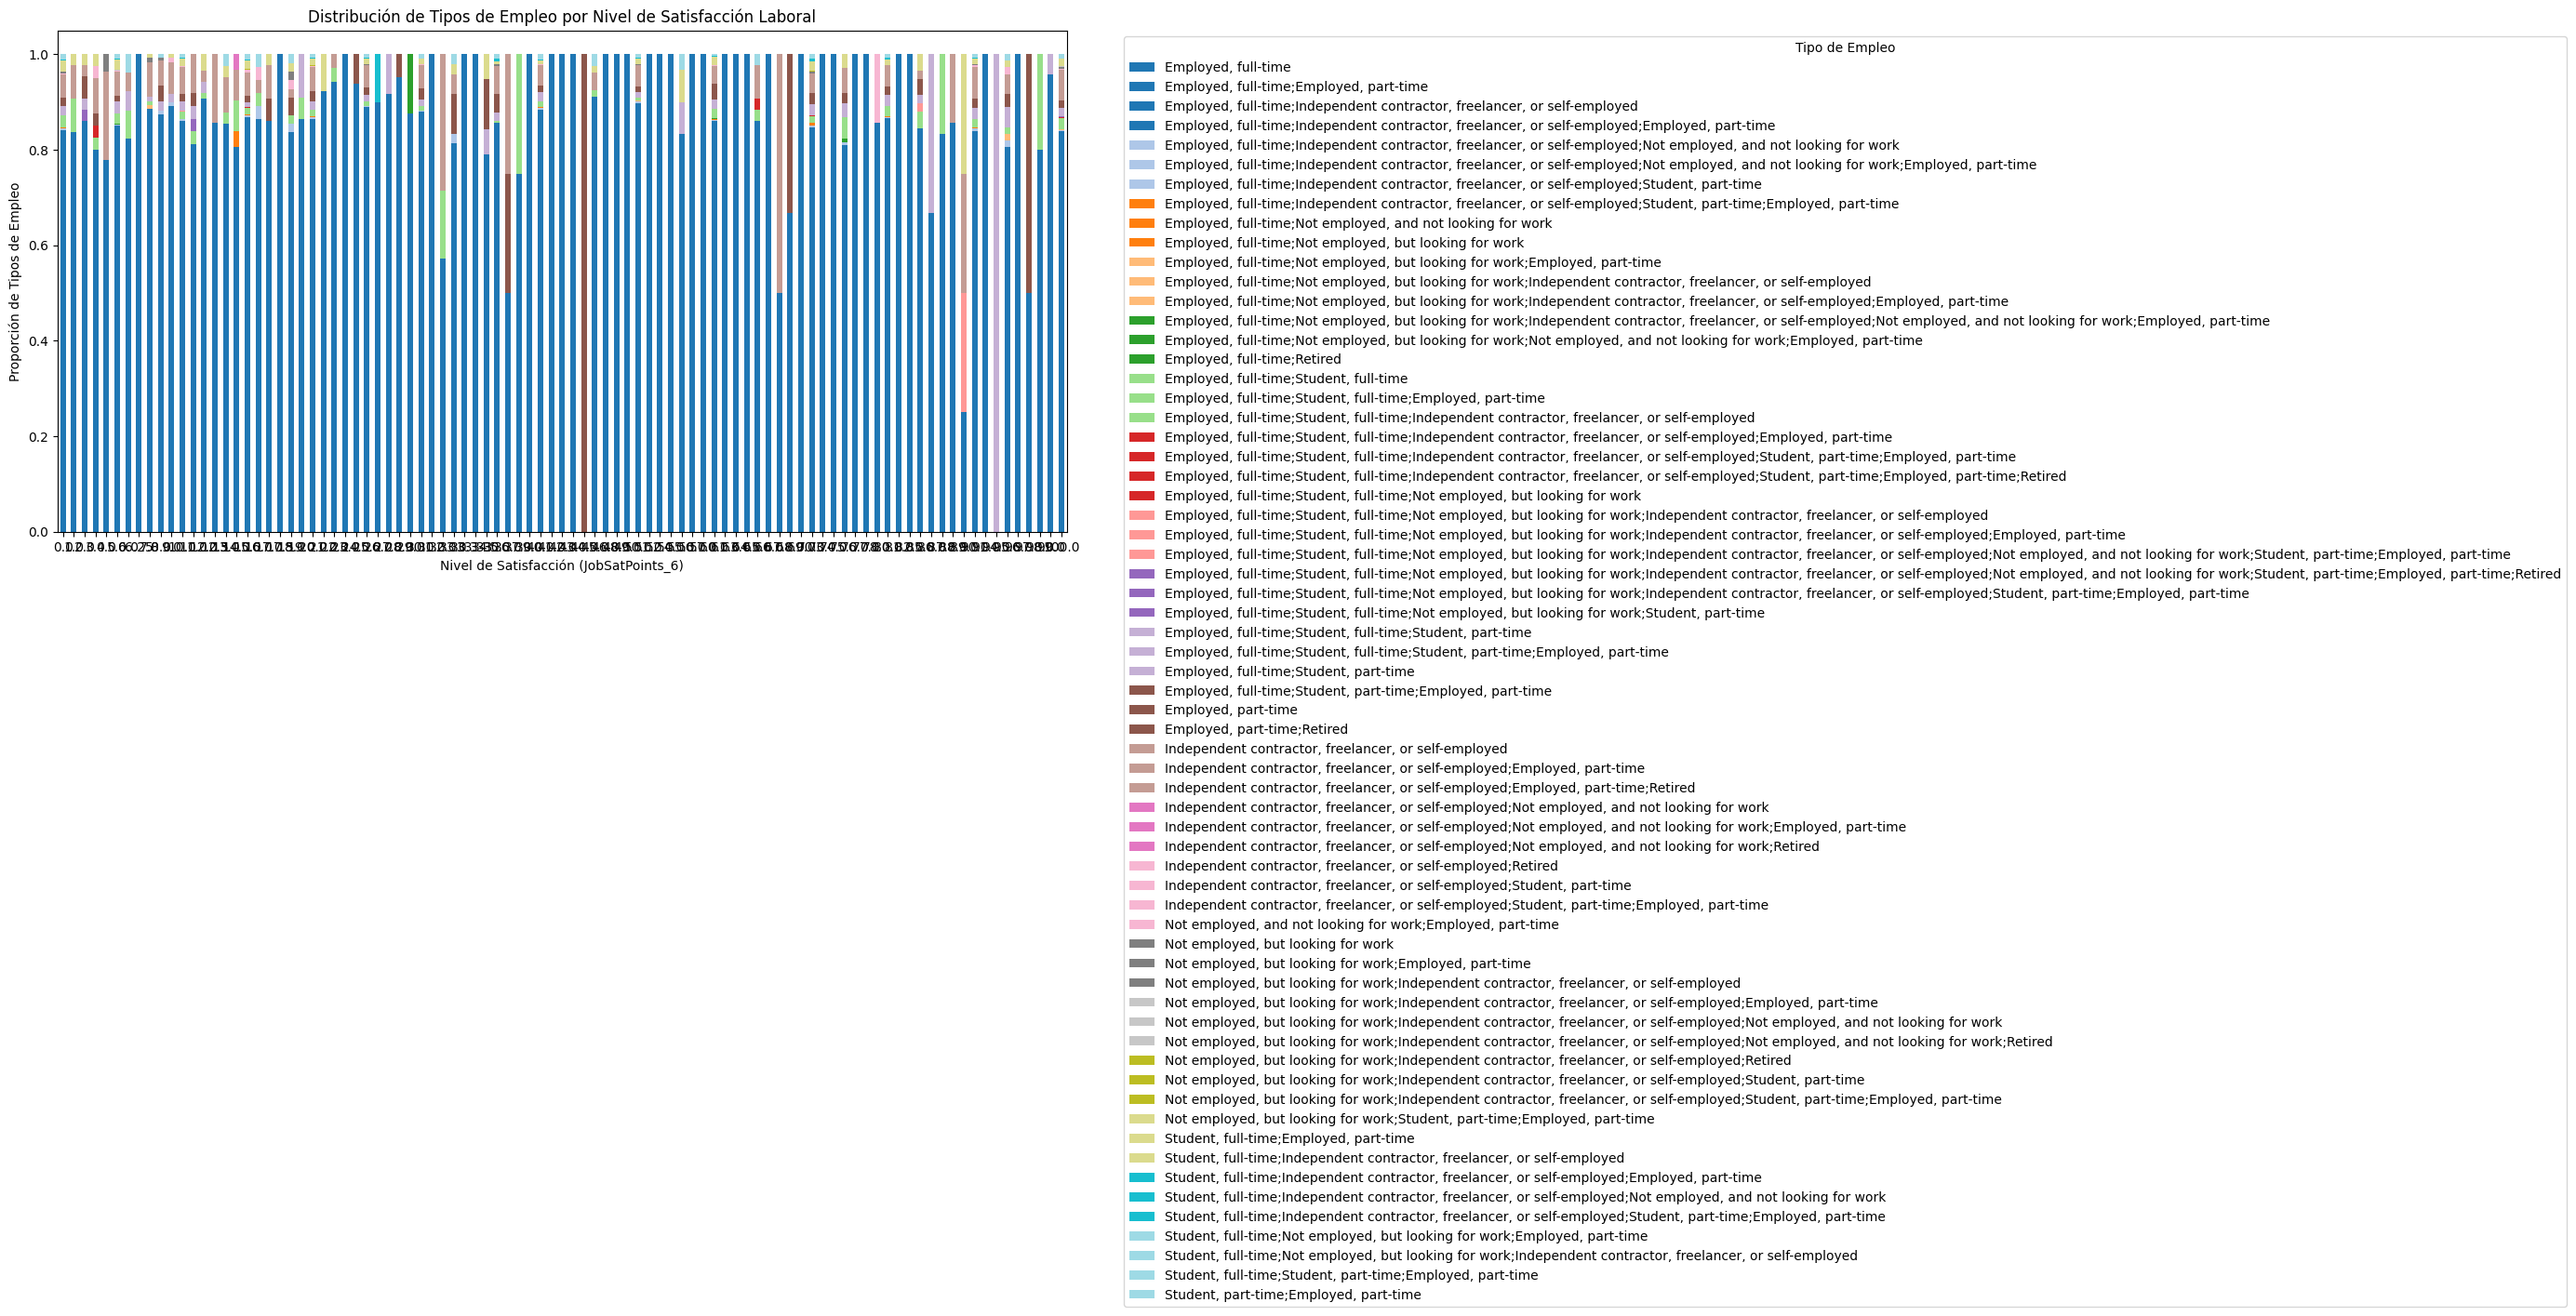

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Filtrar columnas relevantes y eliminar nulos
df_filtered = df[["Employment", "JobSatPoints_6"]].dropna()

# Agrupar por nivel de satisfacción y tipo de empleo
counts = df_filtered.groupby(["JobSatPoints_6", "Employment"]).size().unstack(fill_value=0)

# Convertir a proporciones dentro de cada nivel de satisfacción
proportions = counts.div(counts.sum(axis=1), axis=0)

# Crear gráfico apilado
proportions.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")

# Personalizar el gráfico
plt.title("Distribución de Tipos de Empleo por Nivel de Satisfacción Laboral")
plt.xlabel("Nivel de Satisfacción (JobSatPoints_6)")
plt.ylabel("Proporción de Tipos de Empleo")
plt.legend(title="Tipo de Empleo", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


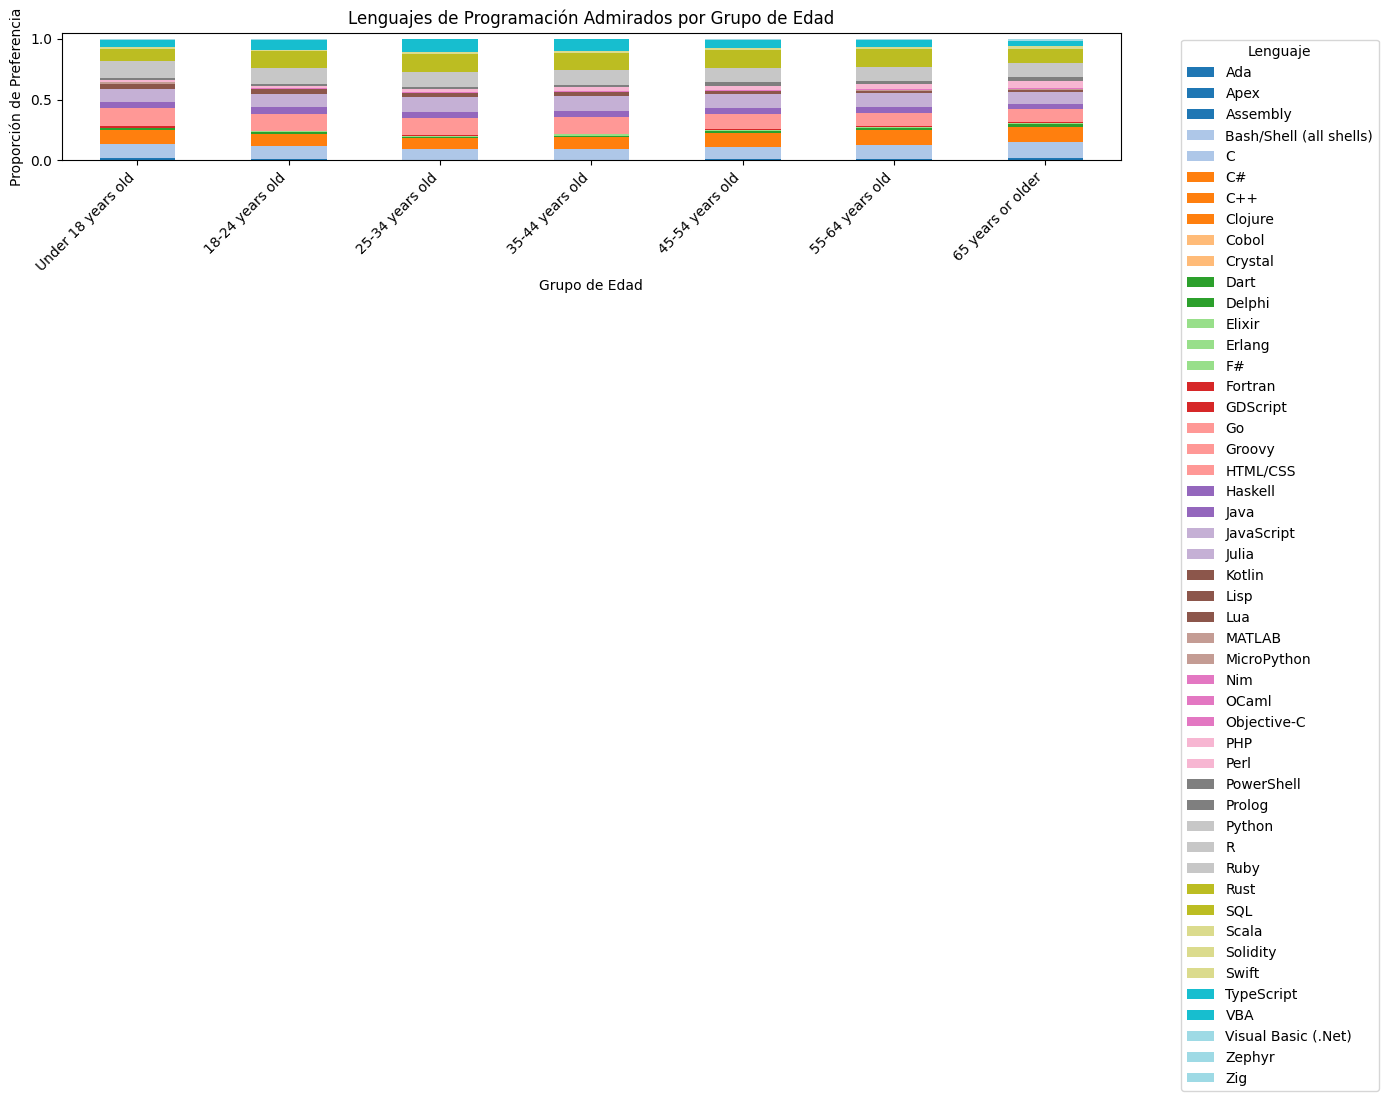

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Definir los grupos de edad válidos
age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]

# Filtrar filas con edad válida y columna LanguageAdmired no nula
df_filtered = df[df["Age"].isin(age_groups)][["Age", "LanguageAdmired"]].dropna()

# Separar múltiples lenguajes (asumiendo que están separados por punto y coma)
df_filtered["LanguageList"] = df_filtered["LanguageAdmired"].str.split(";")

# Expandir filas para cada lenguaje individual
df_exploded = df_filtered.explode("LanguageList")
df_exploded["LanguageList"] = df_exploded["LanguageList"].str.strip()

# Contar ocurrencias por grupo de edad y lenguaje
counts = df_exploded.groupby(["Age", "LanguageList"]).size().unstack(fill_value=0)

# Convertir a proporciones por grupo de edad
proportions = counts.div(counts.sum(axis=1), axis=0)

# Reordenar los grupos de edad
ordered_age_groups = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
proportions = proportions.loc[ordered_age_groups]

# Crear gráfico apilado
proportions.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")

# Personalizar el gráfico
plt.title("Lenguajes de Programación Admirados por Grupo de Edad")
plt.xlabel("Grupo de Edad")
plt.ylabel("Proporción de Preferencia")
plt.legend(title="Lenguaje", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


/tmp/ipykernel_1576/1193155415.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


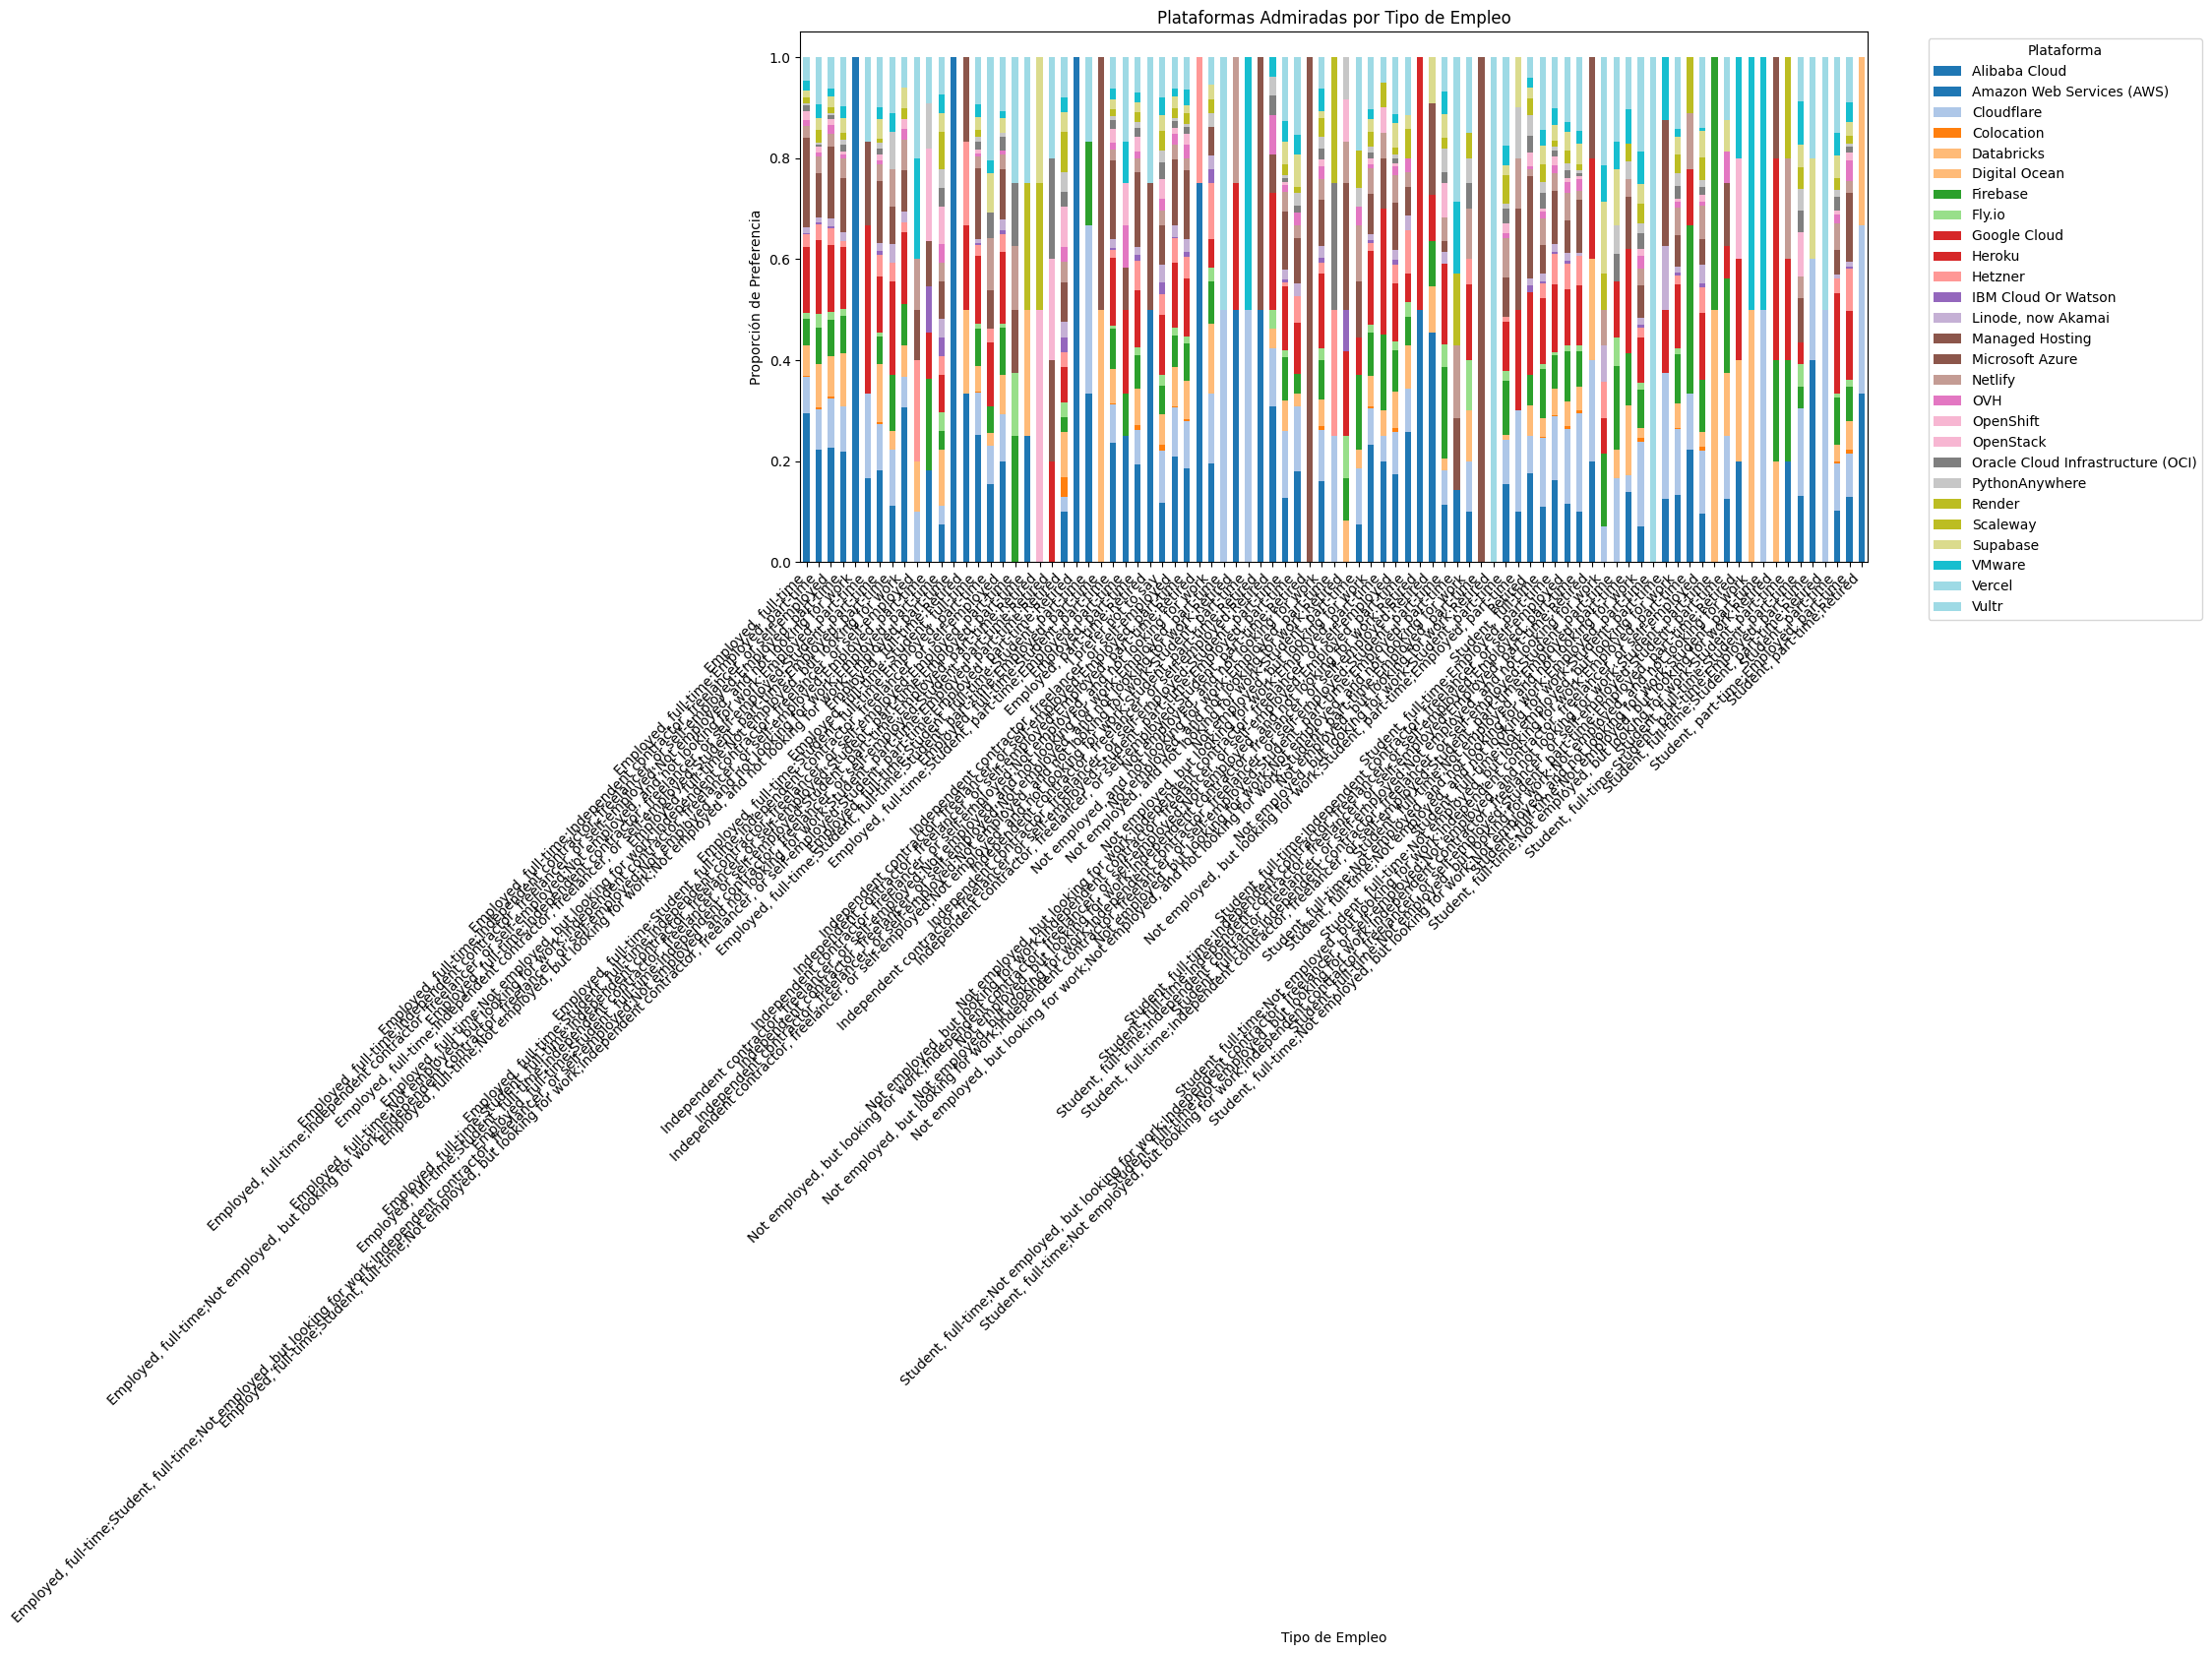

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("survey-data.csv")

# Filtrar columnas relevantes y eliminar nulos
df_filtered = df[["Employment", "PlatformAdmired"]].dropna()

# Separar múltiples plataformas (asumiendo que están separadas por punto y coma)
df_filtered["PlatformList"] = df_filtered["PlatformAdmired"].str.split(";")

# Expandir filas para cada plataforma individual
df_exploded = df_filtered.explode("PlatformList")
df_exploded["PlatformList"] = df_exploded["PlatformList"].str.strip()

# Contar ocurrencias por tipo de empleo y plataforma
counts = df_exploded.groupby(["Employment", "PlatformList"]).size().unstack(fill_value=0)

# Convertir a proporciones dentro de cada tipo de empleo
proportions = counts.div(counts.sum(axis=1), axis=0)

# Crear gráfico apilado
proportions.plot(kind="bar", stacked=True, figsize=(14, 7), colormap="tab20")

# Personalizar el gráfico
plt.title("Plataformas Admiradas por Tipo de Empleo")
plt.xlabel("Tipo de Empleo")
plt.ylabel("Proporción de Preferencia")
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
